# Pre-processing
Once you have cleaned data, which is dependent on the dataset you have and the domain you're in, there are several steps until data will be ready for a ML algorithm:
- Missing values:
    - Univariate Vs Multivariate
    - Nearest neighbors imputation
- Scaling
    - Standard Scaling 
    - Min Max Scaling
    - Max Abs Scaling
    - Mapping to a Uniform distribution
    - Mapping to a Gaussian distribution
- Normalization
- Encoding
    -  Encoding categorical features
- Discretization
    - K-bins discretization
    - Feature binarization
- Classes balancement
    - Up-sample Minority Class
    - Down-sample Majority Class
    - Advanced Classes Balancement methods
      - SMOTE
      - SMOTE in the wild
      - Borderline-SMOTE
      - Borderline-SMOTE SVM
      - Adaptive Synthetic Sampling (ADASYN)
    



## Missing values
For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders. Such datasets however are incompatible with scikit-learn estimators which assume that all values in an array are numerical, and that all have and hold meaning. A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to impute the missing values, i.e., to infer them from the known part of the data.

### Univariate vs. Multivariate Imputation
One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. impute.SimpleImputer). By contrast, multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. impute.IterativeImputer).



### Univariate feature imputation

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.

The following snippet demonstrates how to replace missing values, encoded as np.nan, using the mean value of the columns (axis 0) that contain the missing values:

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
SimpleImputer()
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


The SimpleImputer class also supports categorical data represented as string values or pandas categoricals when using the 'most_frequent' or 'constant' strategy:

In [ ]:
import pandas as pd
df = pd.DataFrame([["a", "x"],
                    [np.nan, "y"],
                    ["a", np.nan],
                    ["b", "y"]], dtype="category")

imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


### Multivariate feature imputation
A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
# the model learns that the second feature is double the first
print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


### Questions about categories?

 Q1: categorical feature example 'univariate' stategy='mean' (what we should expect?):

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([["four", "two"], [np.nan, "three"], ["eight", "six"]])
SimpleImputer()
X = [[np.nan, "two"], [6, np.nan], [7, "six"]]
print(imp.transform(X))

ValueError: ignored

Q2: categorical feature example 'univariate' stategy='median'(what we should expect?):

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
df1 = pd.DataFrame([["a", "x"],
                    [np.nan, "y"],
                    ["a", np.nan],
                    ["b", "y"]], dtype="category")
df2 = pd.DataFrame([["b", "y"],
                    [np.nan, "x"],
                    ["b", np.nan],
                    ["a", "x"]], dtype="category")
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df)


print(imp.transform(df2))

ValueError: ignored

   Q3: categorical feature example 'univariate' stategy='most_frequent'(what we should expect?):

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit([[1, "two"], [np.nan, "three"], [7, "six"]])
X = [[np.nan, "two"], [6, np.nan], [7, "six"]]
print(imp.transform(X))

[[1 'two']
 [6 'six']
 [7 'six']]


Solution for Q3 is to use pandas dataframe with explict dtype="category":

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
df1 = pd.DataFrame([["x"],
                    ["y"],
                    [np.nan],
                    ["y"]], dtype="category")
df2 = pd.DataFrame([["y"],
                    ["x"],
                    [np.nan],
                    ["x"]], dtype="category")
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df1)
print(imp.transform(df2))

[['y']
 ['x']
 ['y']
 ['x']]


Any idea for Q1 and Q2?

Q4: and for the multivariate approach? (what we should expect?):

In [ ]:
df3 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'C' : np.array([3,np.nan,np.nan,np.nan], dtype='float32'),
                     'D' : pd.Categorical(["test","train",np.nan,"train"]),
                     'E' : 'foo' })
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
print(df3)
imp = IterativeImputer(max_iter=10, random_state=0)
print(imp.fit_transform(df3))

     A    B    C      D    E
0  1.0  1.0  3.0   test  foo
1  1.0  1.0  NaN  train  foo
2  1.0  1.0  NaN    NaN  foo
3  1.0  1.0  NaN  train  foo


ValueError: ignored

### Nearest neighbors imputation
The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach. By default, a euclidean distance metric that supports missing values, nan_euclidean_distances, is used to find the nearest neighbors. Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor. If a sample has more than one feature missing, then the neighbors for that sample can be different depending on the particular feature being imputed. When the number of available neighbors is less than n_neighbors and there are no defined distances to the training set, the training set average for that feature is used during imputation. If there is at least one neighbor with a defined distance, the weighted or unweighted average of the remaining neighbors will be used during imputation. If a feature is always missing in training, it is removed during transform. 

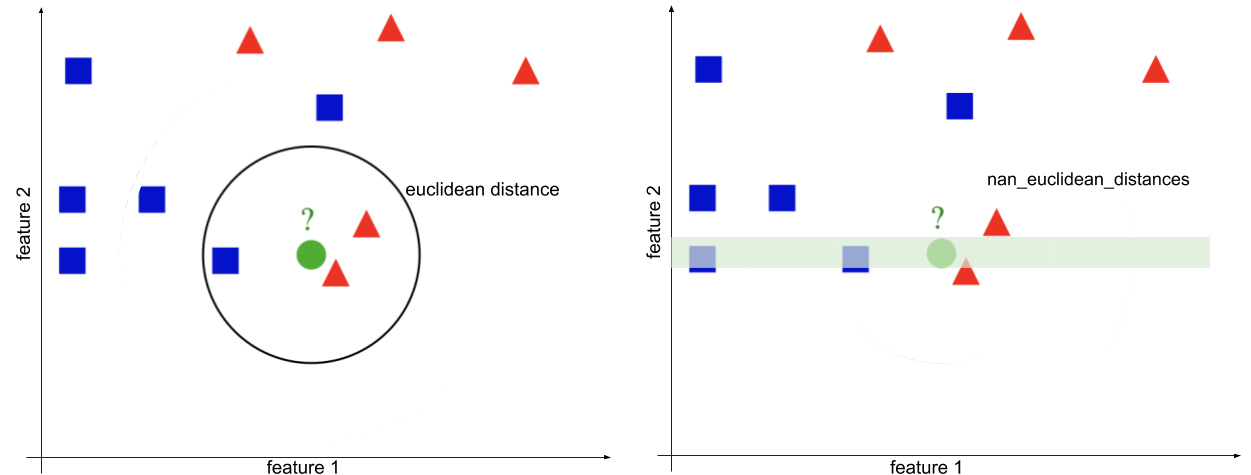
For example, the euclidian_distance between [3, 6] and [1, 5] is:

$\sqrt{((3-1)^2 + (6-5)^2)}$

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.nan_euclidean_distances.html

For example, the nan_euclidian_distance between [3, na, na, 6] and [1, na, 4, 5] is:

$\sqrt{\frac{4}{2}((3-1)^2 + (6-5)^2)}$

$ \frac{4}{2} = \frac{\text{Total # of coordinates}}{\# \text{ of present coordinates}} $

The following snippet demonstrates how to replace missing values, encoded as np.nan, using the mean feature value of the two nearest neighbors of samples with missing values:

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])



---


## Scaling
Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

An interesting tutorial <a href='https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html'>Compare the effect of different scalers on data with outliers</a>

### 2.1 Standard Scaling

Standardize a dataset along any axis.
Center to the mean and component wise scale to unit variance.

$z= \frac{X-\mu}{\sigma}$

mean:
$\mu= \frac{1}{N}\sum_{i=1}^{N}x_i$

standard deviation
$\sigma=\sqrt\frac{\sum_{i=1}^{N}x_i-\mu}{N}$

unit variance condition:
$\sigma^2=1$

The function scale provides a quick and easy way to perform this operation on a single array-like dataset:

In [ ]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                     [ 2.,  0.,  0.],
                     [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X_train)

X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

### Min Max Scaling
An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size.

$X_{MinMaxScaled} = \frac{X - X.min(axis=0)}{X.max(axis=0) - X.min(axis=0)}$

Here is an example to scale a toy data matrix to the [0, 1] range:

In [ ]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

### Max Abs Scaling 
MaxAbsScaler works in a very similar fashion, but scales in a way that the training data lies within the range [-1, 1] by dividing through the largest maximum value in each feature. It is meant for data that is already centered at zero or sparse data.

In [ ]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

In [ ]:
X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs

why above scaled X_test values are not in the range [-1.,1.]????

$X_{MaxAbsScaled} = \frac{X}{X.absolute().max(axis=0)}$

### Mapping to a Uniform distribution
QuantileTransformer and quantile_transform provide a non-parametric transformation to map the data to a uniform distribution with values between 0 and 1:

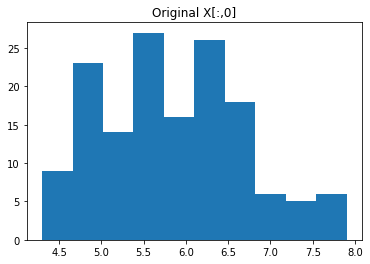

[5.1 3.5 1.4 0.2] 0


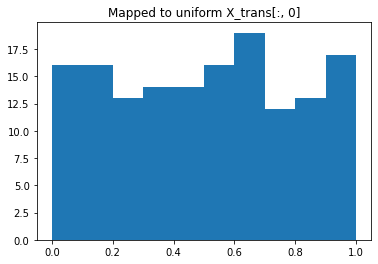

[0.23873874 0.85585586 0.11711712 0.12612613] 0


In [ ]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)
quantile_transformer = preprocessing.QuantileTransformer(random_state=0,n_quantiles=112)
X_trans = quantile_transformer.fit_transform(X)

plt.hist(X[:,0])  # arguments are passed to np.histogram
plt.title("Original X[:,0]")
plt.show()
print(X[0, :],y[0])

plt.hist(X_trans[:,0])  # arguments are passed to np.histogram
plt.title("Mapped to uniform X_trans[:, 0]")
plt.show()
print(X_trans[0, :],y[0])

### Mapping to a Gaussian distribution
It is also possible to map data to a normal distribution using QuantileTransformer by setting output_distribution='normal'. Using the earlier example with the iris dataset:

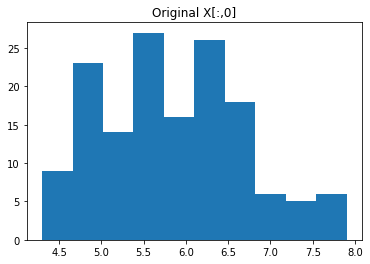

[5.1 3.5 1.4 0.2] 0


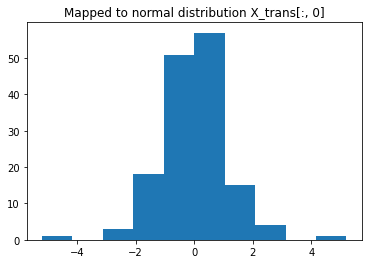

[-0.71036555  1.06188413 -1.18952222 -1.14489597] 0


In [ ]:
X, y = load_iris(return_X_y=True)
quantile_transformer = preprocessing.QuantileTransformer(random_state=0,n_quantiles=112, output_distribution='normal')
X_trans = quantile_transformer.fit_transform(X)

plt.hist(X[:,0])  # arguments are passed to np.histogram
plt.title("Original X[:,0]")
plt.show()
print(X[0, :],y[0])

plt.hist(X_trans[:,0])  # arguments are passed to np.histogram
plt.title("Mapped to normal distribution X_trans[:, 0]")
plt.show()
print(X_trans[0, :],y[0])



---


## Normalization
Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

This assumption is the base of the Vector Space Model often used in text classification and clustering contexts.

The function normalize provides a quick and easy way to perform this operation on a single array-like dataset, either using the l1 or l2 norms:

In [ ]:
from sklearn import preprocessing
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

### $l_1$ norm vs $l_2$ norm


$l_1(v) = ||v||_1$

let v=[$a_1, a_2, a_3$]

$||v||_1 = |a_1| + |a_2| + |a_3|$




In [ ]:
# l1 norm of a vector
from numpy import array
from numpy.linalg import norm
a = array([1, 2, 3])
print(a)
l1 = norm(a, 1)
print(l1)

[1 2 3]
6.0


$l_2(v) = ||v||_2$

let v=[$a_1, a_2, a_3$]

$||v||_2 = \sqrt(a_1^2 + a_2^2 + a_3^2)$

In [ ]:
# l2 norm of a vector
from numpy import array
from numpy.linalg import norm
a = array([1, 2, 3])
print(a)
l2 = norm(a)
print(l2)

[1 2 3]
3.7416573867739413




---


## Encoding
Often features are not given as continuous values but categorical. 

For example a person could have features ["male", "female"], ["from Europe", "from US", "from Asia"], ["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"].

Such features can be efficiently coded as integers, for instance ["male", "from US", "uses Internet Explorer"] could be expressed as [0, 1, 3] while ["female", "from Asia", "uses Chrome"] would be [1, 2, 1].

To convert categorical features to such integer codes, we can use the OrdinalEncoder. This estimator transforms each categorical feature to one new feature of integers (0 to n_categories - 1):

In [ ]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

Such integer representation can, however, not be used directly with all scikit-learn estimators, as these expect continuous input, and would interpret the categories as being ordered, which is often not desired (i.e. the set of browsers was ordered arbitrarily).

Another possibility to convert categorical features to features that can be used with scikit-learn estimators is to use a one-of-K, also known as one-hot or dummy encoding. This type of encoding can be obtained with the OneHotEncoder, which transforms each categorical feature with n_categories possible values into n_categories binary features, with one of them 1, and all others 0.

Continuing the example above:

In [ ]:
enc = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Safari']]).toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

By default, the values each feature can take is inferred automatically from the dataset and can be found in the categories_ attribute:

In [ ]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['from Europe', 'from US'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]

In [ ]:
genders = ['female', 'male']
locations = ['from Africa', 'from Asia', 'from Europe', 'from US']
browsers = ['uses Chrome', 'uses Firefox', 'uses IE', 'uses Safari']
enc = preprocessing.OneHotEncoder(categories=[genders, locations, browsers])
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])

If there is a possibility that the training data might have missing categorical features, it can often be better to specify handle_unknown='ignore' instead of setting the categories manually as above. When handle_unknown='ignore' is specified and unknown categories are encountered during transform, no error will be raised but the resulting one-hot encoded columns for this feature will be all zeros (handle_unknown='ignore' is only supported for one-hot encoding):

In [ ]:
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 0., 0., 0.]])

It is also possible to encode each column into n_categories - 1 columns instead of n_categories columns by using the drop parameter. This parameter allows the user to specify a category for each feature to be dropped. This is useful to avoid co-linearity in the input matrix in some classifiers. Such functionality is useful, for example, when using non-regularized regression (LinearRegression), since co-linearity would cause the covariance matrix to be non-invertible. When this parameter is not None, handle_unknown must be set to error:

In [ ]:
X = [['male', 'from US', 'uses Safari'],
     ['female', 'from Europe', 'uses Firefox']]
drop_enc = preprocessing.OneHotEncoder(drop='first').fit(X)
print(drop_enc.categories_)
drop_enc.transform(X).toarray()

[array(['female', 'male'], dtype=object), array(['from Europe', 'from US'], dtype=object), array(['uses Firefox', 'uses Safari'], dtype=object)]


array([[1., 1., 1.],
       [0., 0., 0.]])

### Embeddings solve the encoding problem

Embeddings are dense numerical representations of real-world objects and relationships, expressed as a vector. The vector space quantifies the semantic similarity between categories. Embedding vectors that are close to each other are considered similar. Sometimes, they are used directly for the “Similar items to this” section in an e-commerce store. Other times, embeddings are passed to other models. In those cases, the model can share learnings across similar items rather than treating them as two completely unique categories, as is the case with one-hot encodings. For this reason, embeddings can be used to accurately represent sparse data like clickstreams, text, and e-commerce purchases as features to downstream models. On the other hand, embeddings are much more expensive to compute than one-hot encodings and are far less interpretable.

**How are Embeddings created?**


A common way to create an embedding requires us to first set up a supervised machine learning problem. As a side-effect, training that model encodes categories into embedding vectors. For example, we can set up a model that predicts the next movie a user will watch based on what they are watching now. An embedding model will factorize the input into a vector and that vector will be used to predict the next movie. This means that similar vectors are movies that are commonly watched after similar movies. This makes for a great representation to be used for personalization. So even though we are solving a supervised problem, often called the surrogate problem, the actual creation of embeddings is an unsupervised process.

Defining a surrogate problem is an art, and dramatically affects the behavior of the embeddings. For example, YouTube’s recommender team realized that using the “predict the next video a user is going to click on” resulted in clickbait becoming rampantly recommended. They moved to “predict the next video and how long they are going to watch it” as a surrogate problem and achieved far better results.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/University/Teaching/Machine Learning/2022/1/balance-scale.csv', 
                 names=['balance', 'var1', 'var2', 'var3', 'var4'])
 
# Display example observations
df.head()

,balance,var1,var2,var3,var4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


#### Principle Component Analysis (PCA)

One method for generating embeddings is called Principal Component Analysis (PCA). PCA reduces the dimensionality of an entity by compressing variables into a smaller subset. This allows the model to behave more effectively but makes variables more difficult to interpret, and generally leads to a loss of information. A popular implementation of PCA is a technique called SVD.

VD reduces the quantity of data set features from N-dimensions to K-dimensions via matrix factorization. For example, let’s represent a user’s video ratings as a matrix of size (Number of users) x (Number of Items) where the value of each cell is the rating that a user gave that item. We first pick a number, k, which is our embedding vector size, and use SVD to turn it into two matrices. One will be (Number of users) x k and the other will be k x (Number of items).

In the resulting matrices, if we multiply a user vector by an item vector, we should get our predicted user rating. If we were to multiply both matrices, we’d end up with the original matrix, but densely filled with all of our predicted ratings. It follows that two items that have similar vectors would result in a similar rating from the same user. In this way, we end up creating user and item embeddings.
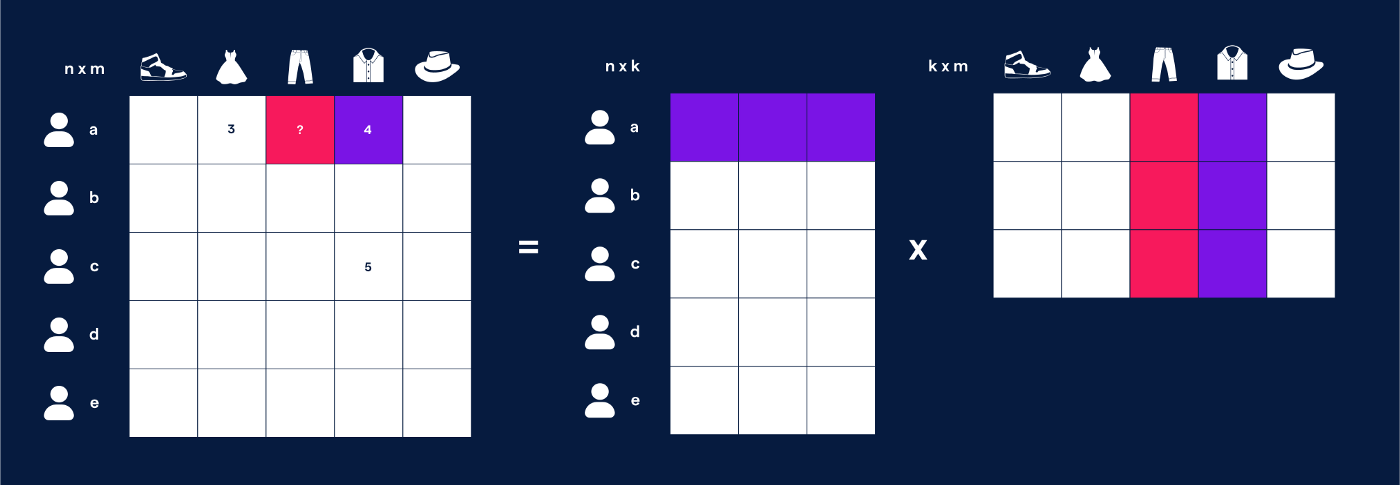

In [ ]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt
# four components
X, y = df.values[:,1:], df.values[:,0]
svd = TruncatedSVD(n_components=X.shape[1]//2, n_iter=100, random_state=5)
U = svd.fit_transform(X)
Sigma = np.diag(svd.singular_values_)
V = svd.components_

In [ ]:
U

array([[ 2.00000000e+00, -2.22044605e-16],
       [ 2.50000000e+00,  1.95642109e-02],
       [ 3.00000000e+00,  3.91284217e-02],
       ...,
       [ 9.00000000e+00, -3.91284217e-02],
       [ 9.50000000e+00, -1.95642109e-02],
       [ 1.00000000e+01, -9.99200722e-16]])

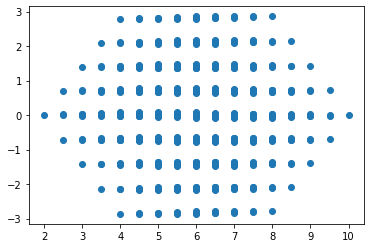

In [ ]:
plt.scatter(U[:, 0], U[:, 1])

#### Word2Vec

Word Embedding is a language modeling technique used for mapping words to vectors of real numbers. It represents words or phrases in vector space with several dimensions. Word embeddings can be generated using various methods like neural networks, co-occurrence matrix, probabilistic models, etc. Word2Vec consists of models for generating word embedding. These models are shallow two-layer neural networks having one input layer, one hidden layer, and one output layer. Word2Vec utilizes two architectures :

**CBOW (Continuous Bag of Words)**: CBOW model predicts the current word given context words within a specific window. The input layer contains the context words and the output layer contains the current word. The hidden layer contains the number of dimensions in which we want to represent the current word present at the output layer. 

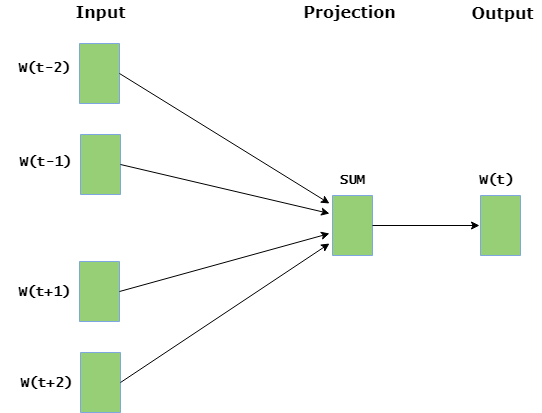

**Skip Gram**: Skip gram predicts the surrounding context words within specific window given current word. The input layer contains the current word and the output layer contains the context words. The hidden layer contains the number of dimensions in which we want to represent current word present at the input layer.

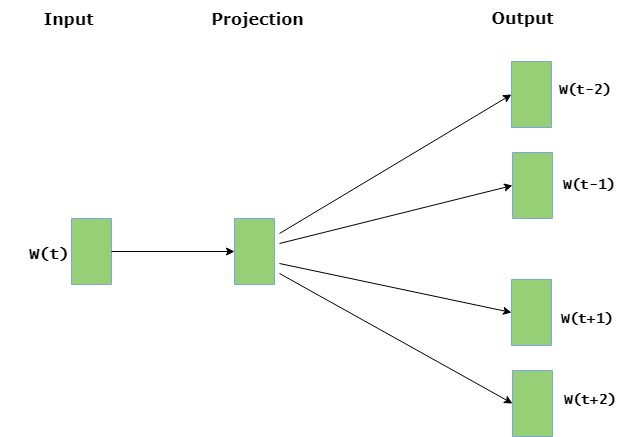

The basic idea of word embedding is words that occur in similar context tend to be closer to each other in vector space. For generating word vectors in Python, modules needed are nltk and gensim. Run these commands in terminal to install **nltk and gensim**:

In [ ]:
!pip install nltk
!pip install gensim

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
 
warnings.filterwarnings(action = 'ignore')
 
import gensim
from gensim.models import Word2Vec
 
#  Reads ‘alice.txt’ file
sample = open("/content/drive/MyDrive/University/Teaching/Machine Learning/2022/1/alice_adventures_in_wonderland.txt")
s = sample.read()
 
# Replaces escape character with space
f = s.replace("\n", " ")
 
data = []
 
# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []
     
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
 
    data.append(temp)
 
# Create CBOW model
model1 = Word2Vec(sentences=data, min_count=1, size=100, window=10)
 
# Print results
print("Cosine similarity between 'alice' " +
               "and 'wonderland' - CBOW : ",
    model1.wv.similarity('alice', 'wonderland'))
     
print("Cosine similarity between 'alice' " +
                 "and 'machines' - CBOW : ",
      model1.wv.similarity('alice', 'machines'))
 
# Create Skip Gram model
model2 = Word2Vec(sentences=data, min_count=1, size=100, window=10, sg=1)
 
# Print results
print("Cosine similarity between 'alice' " +
          "and 'wonderland' - Skip Gram : ",
    model2.wv.similarity('alice', 'wonderland'))
     
print("Cosine similarity between 'alice' " +
            "and 'machines' - Skip Gram : ",
      model2.wv.similarity('alice', 'machines'))

Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.95132697
Cosine similarity between 'alice' and 'machines' - CBOW :  0.9746592


Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.59036845
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.80113643


Output indicates the cosine similarities between word vectors ‘alice’, ‘wonderland’ and ‘machines’ for different models. One interesting task might be to change the parameter values of ‘size’ and ‘window’ to observe the variations in the cosine similarities.  

Words that are found in similar contexts will have similar embeddings. Beyond that, embeddings can be used to form analogies. For example, the vector from king to man is very similar to the one from queen to woman.

One problem with Word2Vec is that single words have one vector mapping. This means that all semantic uses for a word are combined into one representation. For example, the word “play” in “I’m going to see a play” and “I want to play” will have the same embedding, without the ability to distinguish context.

#### Bidirectional Encoder Representations of Transformers (BERT)

BERT is a pre-trained model that solves Word2Vec’s context problems. BERT is trained in two steps. First, it is trained across a huge corpus of data like Wikipedia to generate similar embeddings as Word2Vec. The end-user performs the second training step. They train on a corpus of data that fits their context well, for example, medical literature. BERT will be fine-tuned for that specific use case. Also, to create a word embedding, BERT takes into account the context of the word. That means that the word “play” in “I’m going to see a play” and “I want to play” will correctly have different embeddings. BERT has become the go-to transformer model for generating text embeddings.

In [ ]:
!pip install torch==1.4.0 torchvision==0.5.0
!pip install pytorch-pretrained-bert pytorch-nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# download the files from here: https://drive.google.com/drive/folders/1bYmm45tnbiaf_83opSuANvkpPOD38W1r?usp=share_link
train_df = pd.read_csv('/content/drive/MyDrive/University/Teaching/Machine Learning/2022/1/jigsaw data/jigsaw-toxic-comment-train-processed-seqlen128.csv')
query_data_train = train_df.comment_text.values[:5000]
train_labels = train_df.toxic.values[:5000]

In [ ]:
# add special tokens for BERT to work properly
sentences = ["[CLS] " + query + " [SEP]" for query in query_data_train]
# Tokenize with BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', max_len=128, do_lower_case=True)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

For each tokenized sentence, BERT requires input ids, a sequence of integers identifying each input token to its index number in the BERT tokenizer vocabulary.

In [ ]:
# Set the maximum sequence length. 
MAX_LEN = 128
# Pad our input tokens
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

BERT’s clever language modeling task masks 15% of words in the input and asks the model to predict the missing word. To make BERT better at handling relationships between multiple sentences, the pre-training process also included an additional task: given two sentences (A and B), is B likely to be the sentence that follows A? Therefore we need to tell BERT what task we are solving by using the concept of attention mask and segment mask. In our case, all words in a query will be predicted and we do not have multiple sentences per query. We define the mask below.



In [ ]:
# Create attention masks
attention_masks = []
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

Now it is time to create all tensors and iterators needed during fine-tuning of BERT using our data.

In [ ]:
# Use train_test_split to split our data into train and validation sets for training
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, train_labels, 
                                                            random_state=2022, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2022, test_size=0.1)
                                             
# Convert all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

# Select a batch size for training. 
batch_size = 32

# Create an iterator of our data with torch DataLoader 
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

Finally, it is time to fine-tune the BERT model so that it outputs the intent class given a user query string. For this purpose, we use the BertForSequenceClassification, which is the normal BERT model with an added single linear layer on top for classification. Below we display a summary of the model. The encoder summary is shown only once. The same summary would normally be repeated 12 times. We display only 1 of them for simplicity sake. We can see the BertEmbedding layer at the beginning, followed by a Transformer architecture for each encoder layer: BertAttention, BertIntermediate, BertOutput. At the end, we have the Classifier layer.

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.bert.load_state_dict(model.bert.state_dict())

<All keys matched successfully>

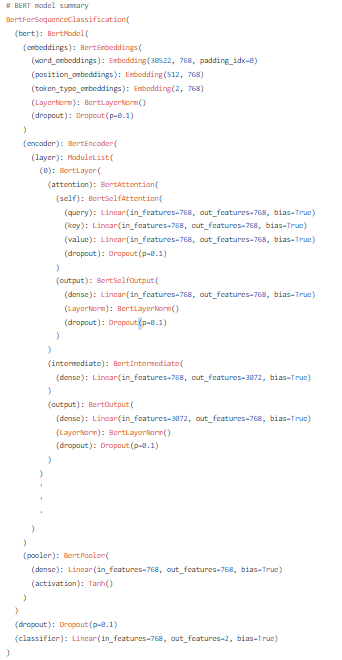

As we feed input data, the entire pre-trained BERT model and the additional untrained classification layer is trained on our specific task. Training the classifier is relatively inexpensive. The bottom layers have already great English words representation, and we only really need to train the top layer, with a bit of tweaking going on in the lower levels to accommodate our task. This is a variant of transfer learning.

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

(tensor([[ 101, 1000, 3100,  ...,    0,    0,    0],
        [ 101, 1000, 2074,  ...,    0,    0,    0],
        [ 101, 2054, 2001,  ...,    0,    0,    0],
        ...,
        [ 101, 2053, 1010,  ...,    0,    0,    0],
        [ 101, 1000, 1024,  ..., 2000, 2421, 1996],
        [ 101, 1000, 2582,  ..., 2008, 2002, 2001]], device='cuda:0'), tensor([[1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]], device='cuda:0'), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0], device='cuda:0'))
(tensor([[  101,  3796,  2033,  ...,     0,     0,     0],
        [  101, 28144, 10698,  ...,     0,     0,     0],
        [  101,  1000,  3746,  ...,     0,     0,     0],
        ...,
        [  101,  6704,  2930,  ...,     0,     0,     0],
      

Epoch:  25%|██▌       | 1/4 [01:56<05:48, 116.02s/it]

Validation Accuracy: 0.960546875
(tensor([[  101,  1996,  2599,  ...,  2819, 28472,  1011],
        [  101, 24181,  2066,  ...,     0,     0,     0],
        [  101,  2008,  2003,  ...,     0,     0,     0],
        ...,
        [  101,  6402,  5877,  ...,     0,     0,     0],
        [  101,  1000,  2092,  ...,     0,     0,     0],
        [  101,  1000,  1045,  ..., 21107,  1012,  1045]], device='cuda:0'), tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 1., 1., 1.]], device='cuda:0'), tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 1], device='cuda:0'))
(tensor([[  101,  2057,  2323,  ...,  4426,  1010,  2061],
        [  101,  1000,  2000,  ...,  8308,  1016, 11936],
        [  101,  1045,  2031,  ...,  3567, 10521, 14697],
        

Epoch:  50%|█████     | 2/4 [03:55<03:56, 118.15s/it]

Validation Accuracy: 0.95546875
(tensor([[  101,  1045,  5993,  ...,     0,     0,     0],
        [  101,  1006,  4901,  ...,     0,     0,     0],
        [  101,  2115,  6685,  ...,  4216,  4637,  2115],
        ...,
        [  101,  1996,  2047,  ...,     0,     0,     0],
        [  101,  2123,  1005,  ..., 12870,  2008,  3861],
        [  101,  2054,  2449,  ...,     0,     0,     0]], device='cuda:0'), tensor([[1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 0., 0., 0.]], device='cuda:0'), tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 0], device='cuda:0'))
(tensor([[  101,  2053,  2801,  ...,     0,     0,     0],
        [  101,  3499,  2033,  ...,     0,     0,     0],
        [  101,  1037, 22437,  ...,     0,     0,     0],
        .

Epoch:  75%|███████▌  | 3/4 [05:56<01:59, 119.50s/it]

Validation Accuracy: 0.964453125
(tensor([[  101, 25352,  1010,  ...,  1037,  3538,  1997],
        [  101,  2644,  6183,  ...,     0,     0,     0],
        [  101,  2073,  2079,  ...,     0,     0,     0],
        ...,
        [  101,  4880,  2237,  ...,     0,     0,     0],
        [  101,  1000,  3531,  ...,     0,     0,     0],
        [  101,  2021,  2023,  ...,     0,     0,     0]], device='cuda:0'), tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.]], device='cuda:0'), tensor([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0'))
(tensor([[ 101, 1000, 3531,  ...,    0,    0,    0],
        [ 101, 1045, 2064,  ...,    0,    0,    0],
        [ 101, 1010, 2107,  ...,    0,    0,    0],
        ...,
        [ 101

Epoch: 100%|██████████| 4/4 [07:58<00:00, 119.55s/it]

Validation Accuracy: 0.967578125


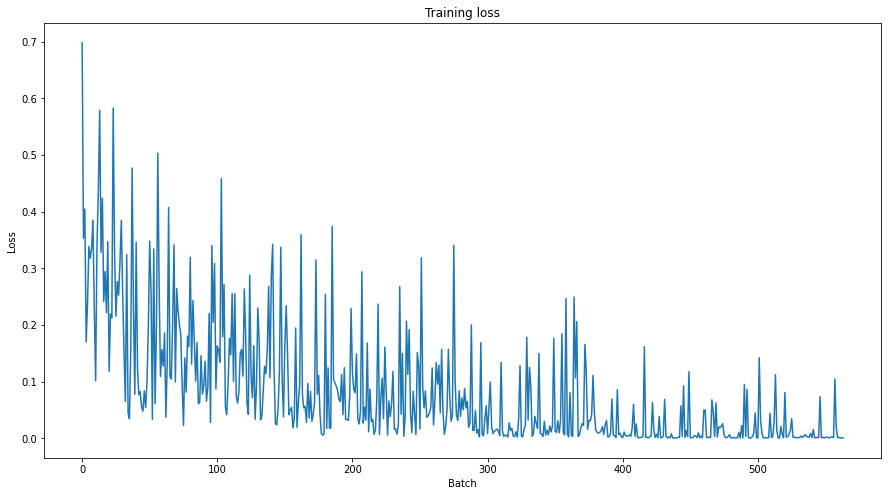

In [ ]:
# BERT fine-tuning parameters
model.to(device)
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = BertAdam(optimizer_grouped_parameters,
                     lr=2e-5,
                     warmup=.1)

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)
  
# Store our loss and accuracy for plotting
train_loss_set = []
# Number of training epochs 
epochs = 4

# BERT training loop
for _ in trange(epochs, desc="Epoch"):  
  
  ## TRAINING
  
  # Set our model to training mode
  model.train()  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    print(batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()
    # Forward pass
    loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    train_loss_set.append(loss.item())    
    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1
  print("Train loss: {}".format(tr_loss/nb_tr_steps))
       
  ## VALIDATION

  # Put model in evaluation mode
  model.eval()
  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0
  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)    
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1
  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

In [ ]:
test_data_df = pd.read_csv('/content/drive/MyDrive/University/Teaching/Machine Learning/2022/1/jigsaw data/test-processed-seqlen128.csv')
test_labels_df = pd.read_csv('/content/drive/MyDrive/University/Teaching/Machine Learning/2022/1/jigsaw data/test_labels.csv')

In [ ]:
# load test data
query_data_test = test_data_df.comment_text.values[:1000]
test_labels = test_labels_df.toxic.values[:1000]
sentences = ["[CLS] " + query + " [SEP]" for query in query_data_test]
labels = test_labels

# tokenize test data
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
MAX_LEN = 128
# Pad our input tokens
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks = []
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# create test tensors
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)
batch_size = 32  
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

## Prediction on test set
# Put model in evaluation mode
model.eval()
# Tracking variables 
predictions , true_labels = [], []
# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  # Telling the model not to compute or store gradients, saving memory and speeding up prediction
  with torch.no_grad():
    # Forward pass, calculate logit predictions
    logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)
  
# Import and evaluate each test batch using Matthew's correlation coefficient
from sklearn.metrics import matthews_corrcoef
matthews_set = []
for i in range(len(true_labels)):
  matthews = matthews_corrcoef(true_labels[i],
                 np.argmax(predictions[i], axis=1).flatten())
  matthews_set.append(matthews)
  
# Flatten the predictions and true values for aggregate Matthew's evaluation on the whole dataset
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
flat_true_labels = [item for sublist in true_labels for item in sublist]

print(f"Matthew's correlation coefficient (MCC) = {matthews_corrcoef(flat_true_labels, flat_predictions)}")


Matthew's correlation coefficient (MCC) = 0.0




---


## Discretization
Discretization (otherwise known as quantization or binning) provides a way to partition continuous features into discrete values. Certain datasets with continuous features may benefit from discretization, because discretization can transform the dataset of continuous attributes to one with only nominal attributes.



### K-bins discretization
KBinsDiscretizer discretizes features into k bins:
<a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer'>open the help page</a>

In [ ]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit(X)

By default the output is one-hot encoded into a sparse matrix (See Encoding categorical features) and this can be configured with the encode parameter. For each feature, the bin edges are computed during fit and together with the number of bins, they will define the intervals. Therefore, for the current example, these intervals are defined as:

feature 1: $[-\infty,-1),[-1,2),[2,\infty)$

feature 2: $[-\infty,5),[5,\infty)$

feature 3: $[-\infty,14),[14,\infty)$

Based on these bin intervals, X is transformed as follows:

In [ ]:
est.transform(X)

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

Strategies:
- uniform : constant bins width
- quantile : equally distributed 
- kmeans : based on k-means clustering procedure applied on each feature independently

more info on kmeans and clustering with scikitlearn <a href='https://scikit-learn.org/stable/modules/clustering.html'>here</a>


Example of K-bins discretization with different strategies:
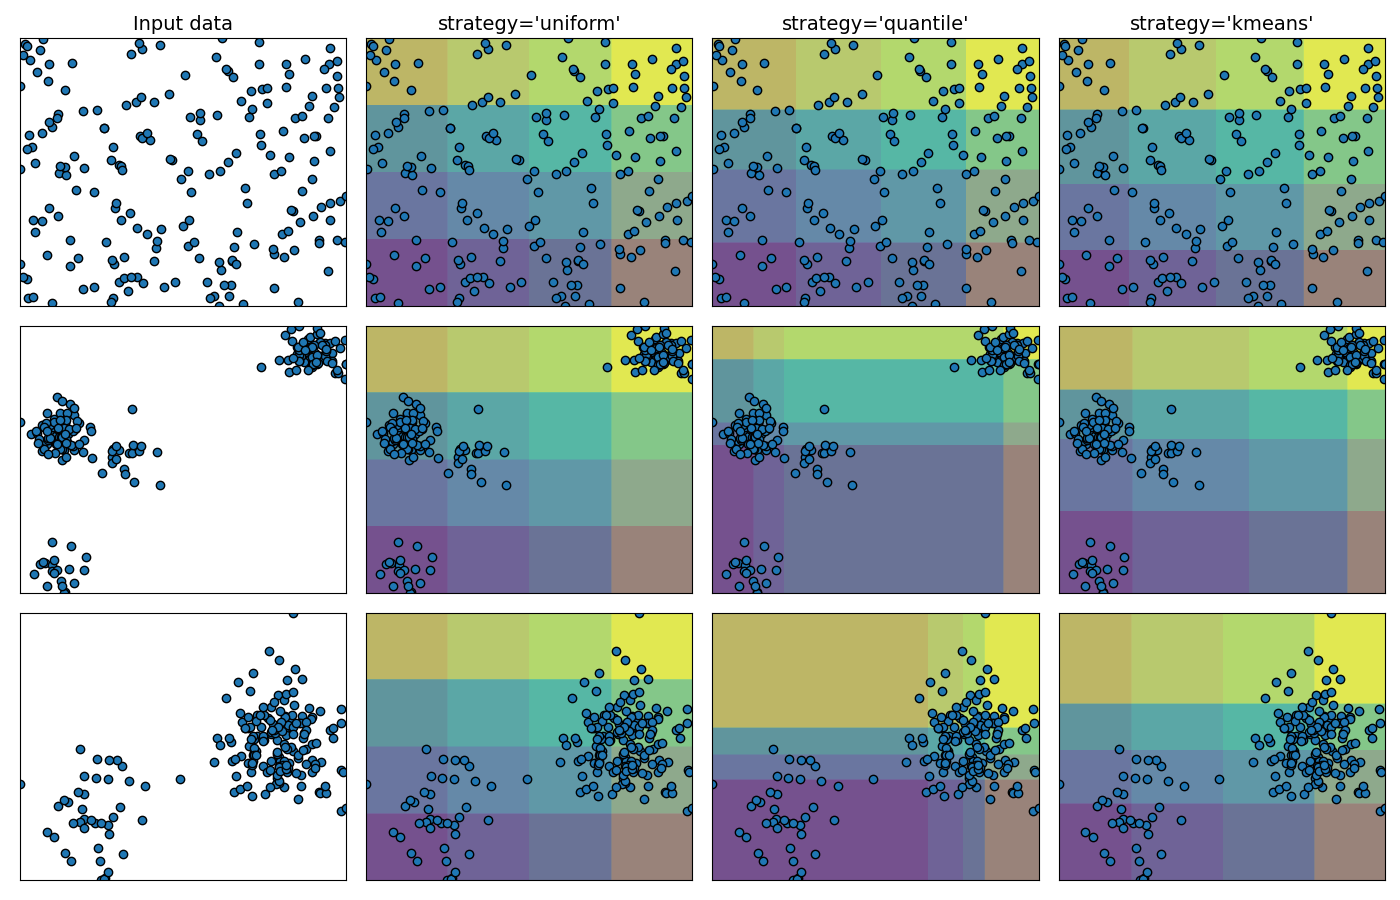

---



### Feature binarization
Feature binarization is the process of thresholding numerical features to get boolean values. 

As for the Normalizer, the utility class Binarizer is meant to be used in the early stages of sklearn.pipeline.Pipeline. The fit method does nothing as each sample is treated independently of others:


In [ ]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

binarizer = preprocessing.Binarizer().fit(X)  # fit does nothing
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

It is possible to adjust the threshold of the binarizer:

In [ ]:
binarizer = preprocessing.Binarizer(threshold=1.1)
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])



---



## Classes balancement

We consider the dataset available at: http://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/

First we load a 'csv' file to a pandas data frame:

In [ ]:
import pandas as pd
import os
 
# Read dataset
# change the path to your destination
df = pd.read_csv('/content/drive/MyDrive/University/Teaching/Machine Learning/2022/1/balance-scale.csv', 
                 names=['balance', 'var1', 'var2', 'var3', 'var4'])
 
# Display example observations
df.head()

,balance,var1,var2,var3,var4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


we count the occurrences of the classes for the 'balance' column:

In [ ]:
df['balance'].value_counts()

R    288
L    288
B     49
Name: balance, dtype: int64

However, for this tutorial, we're going to turn this into a binary classification problem.

We're going to label each observation as 1 (positive class) if the scale is balanced or 0 (negative class) if the scale is not balanced:

In [ ]:
# Transform into binary classification
df['balance'] = [1 if b=='B' else 0 for b in df.balance]
 
df['balance'].value_counts()

0    576
1     49
Name: balance, dtype: int64

As you can see, only about 8% of the observations were balanced. Therefore, if we were to always predict 0, we'd achieve an accuracy of 92%.

### Up-sample Minority Class
Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.

There are several heuristics for doing so, but the most common way is to simply resample with replacement.

First, we'll import the resampling module from Scikit-Learn:

In [ ]:
from sklearn.utils import resample

Next, we'll create a new DataFrame with an up-sampled minority class. Here are the steps:

- First, we'll separate observations from each class into different DataFrames.
- Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.
- Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

Here's the code:

In [ ]:
# Separate majority and minority classes
df_majority = df[df.balance==0]
df_minority = df[df.balance==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=576, random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.balance.value_counts()

0    576
1    576
Name: balance, dtype: int64

As you can see, the new DataFrame has more observations than the original, and the ratio of the two classes is now 1:1.

---


### Down-sample Majority Class

Down-sampling involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm.

The most common heuristic for doing so is resampling without replacement.

The process is similar to that of up-sampling. Here are the steps:

- First, we'll separate observations from each class into different DataFrames.
- Next, we'll resample the majority class without replacement, setting the number of samples to match that of the minority class.
- Finally, we'll combine the down-sampled majority class DataFrame with the original minority class DataFrame.

Here's the code:

In [ ]:
# Separate majority and minority classes
df_majority = df[df.balance==0]
df_minority = df[df.balance==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=49,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.balance.value_counts()
# 1    49
# 0    49
# Name: balance, dtype: int64


0    49
1    49
Name: balance, dtype: int64



---



### Advanced Classes Balancement methods

In scikit learn there are estimators that are 'Penalize Algorithms' (Cost-Sensitive Training):
you can see examples at https://elitedatascience.com/imbalanced-classes

in this tutorial we show the SMOTE algorithm.
https://github.com/scikit-learn-contrib/imbalanced-learn

We need to install the 'imbalanced-learn' module

and open the documentation <a href='https://imbalanced-learn.org/stable/introduction.html'>link</a>.


#### SMOTE

The imbalanced_learn module is today very popular and the package is now rich of different variants.
You are invited to read the documentation.

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

First, we can use the make_classification() scikit-learn function to create a synthetic binary classification dataset with 10,000 examples and a 1:100 class distribution.

In [ ]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

We can use the Counter object to summarize the number of examples in each class to confirm the dataset was created correctly.

In [ ]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


Finally, we can create a scatter plot of the dataset and color the examples for each class a different color to clearly see the spatial nature of the class imbalance.

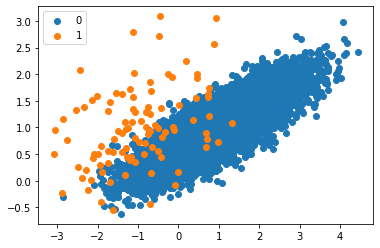

In [ ]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

A scatter plot of the dataset is created showing the large mass of points that belong to the majority class (blue) and a small number of points spread out for the minority class (orange). We can see some measure of overlap between the two classes.

Next, we can oversample the minority class using SMOTE and plot the transformed dataset.

We can use the SMOTE implementation provided by the imbalanced-learn Python library in the SMOTE class.

The SMOTE class acts like a data transform object from scikit-learn in that it must be defined and configured, fit on a dataset, then applied to create a new transformed version of the dataset.

For example, we can define a SMOTE instance with default parameters that will balance the minority class and then fit and apply it in one step to create a transformed version of our dataset.

In [ ]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

Once transformed, we can summarize the class distribution of the new transformed dataset, which would expect to now be balanced through the creation of many new synthetic examples in the minority class.

Counter({0: 9900, 1: 9900})


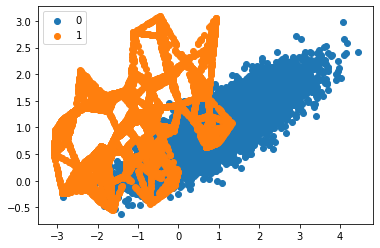

In [ ]:
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

A scatter plot of the transformed dataset can also be created and we would expect to see many more examples for the minority class on lines between the original examples in the minority class.

The original paper on SMOTE suggested combining SMOTE with random undersampling of the majority class.

The imbalanced-learn library supports random undersampling via the RandomUnderSampler class.

We can update the example to first oversample the minority class to have 10 percent the number of examples of the majority class (e.g. about 1,000), then use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class (e.g. about 2,000).

To implement this, we can specify the desired ratios as arguments to the SMOTE and RandomUnderSampler classes; for example:

In [ ]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

We can then chain these two transforms together into a Pipeline.

The Pipeline can then be applied to a dataset, performing each transformation in turn and returning a final dataset with the accumulation of the transform applied to it, in this case oversampling followed by undersampling.

In [ ]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

The pipeline can then be fit and applied to our dataset just like a single transform:



In [ ]:
# transform the dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
X, y = pipeline.fit_resample(X, y)

Counter({0: 1980, 1: 990})


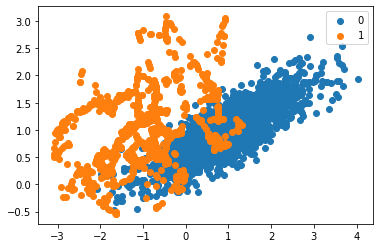

In [ ]:
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Running the example first creates the dataset and summarizes the class distribution.

Next, the dataset is transformed, first by oversampling the minority class, then undersampling the majority class. The final class distribution after this sequence of transforms matches our expectations with a 1:2 ratio or about 2,000 examples in the majority class and about 1,000 examples in the minority class.

Finally, a scatter plot of the transformed dataset is created, showing the oversampled minority class and the undersampled majority class.



---



Now that we are familiar with transforming imbalanced datasets, let’s look at using SMOTE when fitting and evaluating classification models.

#### SMOTE in the wild

n this section, we will look at how we can use SMOTE as a data preparation method when fitting and evaluating machine learning algorithms in scikit-learn.

First, we use our binary classification dataset from the previous section then fit and evaluate a decision tree algorithm.

The algorithm is defined with any required hyperparameters (we will use the defaults), then we will use repeated stratified [k-fold cross-validation](https://machinelearningmastery.com/k-fold-cross-validation/) to evaluate the model. We will use three repeats of 10-fold cross-validation, meaning that 10-fold cross-validation is applied three times fitting and evaluating 30 models on the dataset.

The dataset is stratified, meaning that each fold of the cross-validation split will have the same class distribution as the original dataset, in this case, a 1:100 ratio. We will evaluate the model using the [ROC area under curve (AUC) metric](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/). This can be optimistic for severely imbalanced datasets but will still show a relative change with better performing models.

In [ ]:
# decision tree evaluated on imbalanced dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# define model
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=100, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

Once fit, we can calculate and report the mean of the scores across the folds and repeats.



In [ ]:
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.768


**Note**: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

Now, we can try the same model and the same evaluation method, although use a SMOTE transformed version of the dataset.

The correct application of oversampling during k-fold cross-validation is to apply the method to the training dataset only, then evaluate the model on the stratified but non-transformed test set.

This can be achieved by defining a Pipeline that first transforms the training dataset with SMOTE then fits the model.

In [ ]:
# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

This pipeline can then be evaluated using repeated k-fold cross-validation.



In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=100, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.819


As mentioned in the paper, it is believed that SMOTE performs better when combined with undersampling of the majority class, such as random undersampling.

We can achieve this by simply adding a RandomUnderSampler step to the Pipeline.

As in the previous section, we will first oversample the minority class with SMOTE to about a 1:10 ratio, then undersample the majority class to achieve about a 1:2 ratio.

In [ ]:
# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

In [ ]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=100, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.842


You could explore testing different ratios of the minority class and majority class (e.g. changing the sampling_strategy argument) to see if a further lift in performance is possible.

Another area to explore would be to test different values of the k-nearest neighbors selected in the SMOTE procedure when each new synthetic example is created. The default is k=5, although larger or smaller values will influence the types of examples created, and in turn, may impact the performance of the model.

For example, we could grid search a range of values of k, such as values from 1 to 7, and evaluate the pipeline for each value.

In [ ]:
# grid search k value for SMOTE oversampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = DecisionTreeClassifier()
	over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.834
> k=2, Mean ROC AUC: 0.838
> k=3, Mean ROC AUC: 0.838
> k=4, Mean ROC AUC: 0.827
> k=5, Mean ROC AUC: 0.843
> k=6, Mean ROC AUC: 0.858
> k=7, Mean ROC AUC: 0.855


Running the example will perform SMOTE oversampling with different k values for the KNN used in the procedure, followed by random undersampling and fitting a decision tree on the resulting training dataset.

The mean ROC AUC is reported for each configuration.

Now that we are familiar with how to use SMOTE when fitting and evaluating classification models, let’s look at some extensions of the SMOTE procedure.


---



#### SMOTE With Selective Synthetic Sample Generation

We can be selective about the examples in the minority class that are oversampled using SMOTE.

In this section, we will review some extensions to SMOTE that are more selective regarding the examples from the minority class that provide the basis for generating new synthetic examples.



##### **Borderline-SMOTE**
A popular extension to SMOTE involves selecting those instances of the minority class that are misclassified, such as with a k-nearest neighbor classification model.

We can then oversample just those difficult instances, providing more resolution only where it may be required.

These examples that are misclassified are likely ambiguous and in a region of the edge or border of decision boundary where class membership may overlap. As such, this modified to SMOTE is called Borderline-SMOTE and was proposed by Hui Han, et al. in their 2005 paper titled “[Borderline-SMOTE: A New Over-Sampling Method in Imbalanced Data Sets Learning.](https://link.springer.com/chapter/10.1007/11538059_91)”

The authors also describe a version of the method that also oversampled the majority class for those examples that cause a misclassification of borderline instances in the minority class. This is referred to as Borderline-SMOTE1, whereas the oversampling of just the borderline cases in minority class is referred to as Borderline-SMOTE2.

We can implement Borderline-SMOTE1 using the BorderlineSMOTE class from imbalanced-learn.

We can demonstrate the technique on the synthetic binary classification problem used in the previous sections.

Instead of generating new synthetic examples for the minority class blindly, we would expect the Borderline-SMOTE method to only create synthetic examples along the decision boundary between the two classes.

The complete example of using Borderline-SMOTE to oversample binary classification datasets is listed below.

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


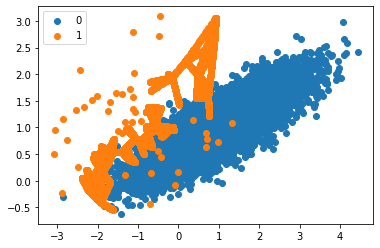

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Finally, a scatter plot of the transformed dataset is created. The plot clearly shows the effect of the selective approach to oversampling. Examples along the decision boundary of the minority class are oversampled intently (orange).

The plot shows that those examples far from the decision boundary are not oversampled. This includes both examples that are easier to classify (those orange points toward the top left of the plot) and those that are overwhelmingly difficult to classify given the strong class overlap (those orange points toward the bottom right of the plot).

##### **Borderline-SMOTE SVM**

Hien Nguyen, et al. suggest using an alternative of Borderline-SMOTE where an SVM algorithm is used instead of a KNN to identify misclassified examples on the decision boundary.

Their approach is summarized in the 2009 paper titled “[Borderline Over-sampling For Imbalanced Data Classification.](http://ousar.lib.okayama-u.ac.jp/en/19617)” An SVM is used to locate the decision boundary defined by the support vectors and examples in the minority class that close to the support vectors become the focus for generating synthetic examples.

In addition to using an SVM, the technique attempts to select regions where there are fewer examples of the minority class and tries to extrapolate towards the class boundary.

This variation can be implemented via the SVMSMOTE class from the imbalanced-learn library.

The example below demonstrates this alternative approach to Borderline SMOTE on the same imbalanced dataset.

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


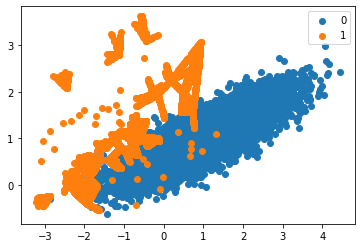

In [ ]:
# borderline-SMOTE with SVM for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Running the example first summarizes the raw class distribution, then the balanced class distribution after applying Borderline-SMOTE with an SVM model.

A scatter plot of the dataset is created showing the directed oversampling along the decision boundary with the majority class.

We can also see that unlike Borderline-SMOTE, more examples are synthesized away from the region of class overlap, such as toward the top left of the plot.

##### **Adaptive Synthetic Sampling (ADASYN)**

Another approach involves generating synthetic samples inversely proportional to the density of the examples in the minority class.

That is, generate more synthetic examples in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high.

This modification to SMOTE is referred to as the Adaptive Synthetic Sampling Method, or ADASYN, and was proposed to Haibo He, et al. in their 2008 paper named for the method titled “[ADASYN: Adaptive Synthetic Sampling Approach For Imbalanced Learning](https://ieeexplore.ieee.org/document/4633969).”

With online Borderline-SMOTE, a discriminative model is not created. Instead, examples in the minority class are weighted according to their density, then those examples with the lowest density are the focus for the SMOTE synthetic example generation process.

We can implement this procedure using the ADASYN class in the imbalanced-learn library.

The example below demonstrates this alternative approach to oversampling on the imbalanced binary classification dataset.

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9899})


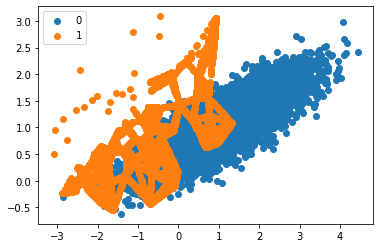

In [ ]:
# Oversample and plot imbalanced dataset with ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

A scatter plot of the transformed dataset is created. Like Borderline-SMOTE, we can see that synthetic sample generation is focused around the decision boundary as this region has the lowest density.

Unlike Borderline-SMOTE, we can see that the examples that have the most class overlap have the most focus. On problems where these low density examples might be outliers, the ADASYN approach may put too much attention on these areas of the feature space, which may result in worse model performance.

It may help to remove outliers prior to applying the oversampling procedure, and this might be a helpful heuristic to use more generally.